Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Borná Djavdan, SNR: 2007904, ANR: U749817"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [3]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

#### Explanation
`n_observations = 100` appoints the value `100` to the variable `n_observations`.  
`x = np.random.uniform(0,2,size=n_observations)` uses the `random` function from numpy to create an uniformly distributed random sample (within an array) existing of `100` observations (`size=n_observations`) between `0` and `2`, and assigns this to the variable `x`.    
`df = pd.DataFrame({'x': x})` creates a dataframe (`Dataframe` function from Pandas) using a dictionary where the key is the string `'x'` and the value is the full array `x` as difined earlier. This dataframe gets then assigned to the variable `df`.

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [4]:
y = 3*x+5
z = (x-1)**2
df['y'] = (y)
df['z'] = (z)

`y = 3*x+5`: Creates a `y` variable explained by the function $y=3*x+5$.   
`z = (x-1)**2`: Creates a `z` variable explained by the function $z = (x-1)^2$.   
`df['y'] = (y)`: Creates a column of the values created by using the y variable and the initial input of the x values.   
`df['z'] = (z)`: Creates a column of the values created by using the x variable and the initial input of the x values.  
The last 2 lines of code also add these values to the dataframe.

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [5]:
df.describe()

,x,y,z
count,100.000000,100.000000,100.000000
mean,0.913778,7.741334,0.309253
std,0.552148,1.656444,0.274910
min,0.009530,5.028591,0.000019
25%,0.440089,6.320268,0.082978
50%,0.905721,7.717164,0.241391
75%,1.386105,9.158315,0.471134
max,1.978517,10.935550,0.981030


The mean for `x` is `1.054485`.  
The mean for `y` is `8.163454`.  
The standard deviation for `x` is `0.553661`.  
The standard deviation for `y` is `1.660984`.  

#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

In [6]:
mean_y = df['x'].mean() * 3 + 5
std_y = df['x'].std() * 3
print(round(mean_y,ndigits=6))
print(round(std_y,ndigits=6))

7.741334
1.656444


The mean of `y` is explained using the following relationship: 
\begin{equation}
\ \mu_y = \mu_x * 3 + 5
\end{equation}
The standard deviation of `y` is explained using the following relationship: 
\begin{equation}
\ \sigma_y = \sigma_x * 3 
\end{equation}



#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

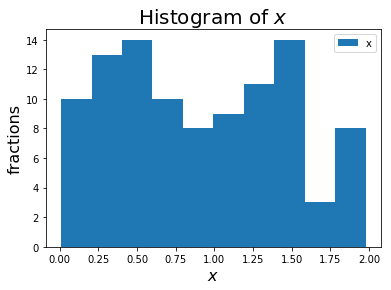

In [7]:
plt.hist(x=df['x'],)
plt.legend(['x','fractions'])
plt.xlabel('$x$', fontsize=16)
plt.title('Histogram of $x$', fontsize=20)
plt.ylabel('fractions', fontsize=16)
plt.show()

`plt.hist(x=df['x'],)` is what creates the histogram of `x`.  
`plt.legend()` is the code for the legend.   
`plt.xlabel()` and `plt.ylabel()` name the labels.     
`plt.title()` is for the title.  
`plt.show()` shows the graph. 

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

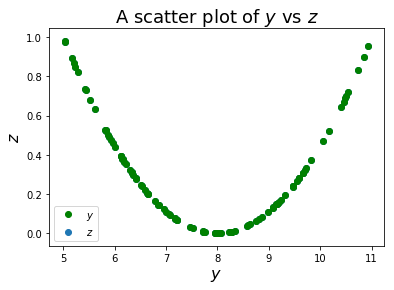

In [8]:
plt.scatter(df['y'], df['z'])
plt.xlabel('$y$', fontsize=16)
plt.ylabel('$z$', fontsize=16)
plt.plot(y, z, 'go',)
plt.title('A scatter plot of $y$ vs $z$', fontsize=18)
plt.legend(['$y$', '$z$'])
plt.show()

#### Explanation: 
`plt.scatter()` creates the scatter plot.   
`plt.plot()` plots x on y.
`plt.legend()` is the code for the legend.   
`plt.xlabel()` and `plt.ylabel()` name the labels.   
`plt.title()`for the title.  
`plt.show()` shows the graph.   

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

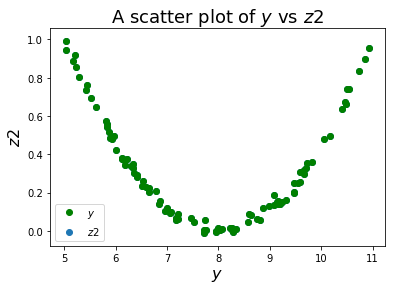

In [9]:
z2 = z + np.random.normal(0,0.02,size=100)
plt.scatter(df['y'], z2)
plt.xlabel('$y$', fontsize=16)
plt.ylabel('$z2$', fontsize=16)
plt.plot(y, z2, 'go',)
plt.title('A scatter plot of $y$ vs $z2$', fontsize=18)
plt.legend(['$y$', '$z2$'])
plt.show()

#### Explanation: 
`z2 = z + np.random.normal(0,0.02,size=100)` Create a variable z2 equal to z with some "noise" added to it.  
`plt.scatter()` creates the scatter plot.   
`plt.legend()` is the code for the legend.   
`plt.xlabel()` and `plt.ylabel()` name the labels.   
`plt.title()`for the title.  
`plt.show()` shows the graph.   

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.